# Image Classification
In this exercise, you will be classifying images about clothes. The data set you will be using is called `fashion-small.csv`.

### Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.


In [53]:
# import your libraries 
import pandas as pd
import numpy as np

# import classifers
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

# 1. Inspect and explore our data
1. Load the `fashion-small.csv` data into a pandas dataframe. 
2. Inspect / remove null values. 
3. Inspect / remove duplicate rows. 
4. Print out the number examples in each class aka the class balances. 
5. Visualize at least one image.

In [2]:
# 1. Load data into a pandas dataframe. 
df = pd.read_csv('data/fashion-small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,T-shirt/top,0,0,0,0,0,0,0,0,0,...,66,25,0,0,0,0,0,0,0,0
1,Trouser,0,0,0,0,0,0,0,0,0,...,170,25,0,0,0,0,0,0,0,0
2,Dress,0,0,0,0,0,0,0,0,0,...,76,80,0,0,0,1,0,0,0,0
3,Ankle boot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Dress,0,0,0,0,0,0,0,22,53,...,79,78,18,0,2,0,0,0,0,0


### Inspect for null values

In [3]:
# 2. Inspect / remove null values. 
df.isnull().sum().sum()

0

### Check for duplicates

In [4]:
# 3. Inspect / remove duplicate rows. 
df.duplicated().sum()

0

### Lets look at our class balances

In [5]:
# 4. Print out the number examples in each class aka the class balances. 
df.label.value_counts(), df.label.value_counts(normalize=True)

(Sandal         646
 Trouser        612
 Ankle boot     605
 Shirt          601
 Pullover       598
 Coat           597
 T-shirt/top    590
 Dress          585
 Bag            584
 Sneaker        582
 Name: label, dtype: int64,
 Sandal         0.107667
 Trouser        0.102000
 Ankle boot     0.100833
 Shirt          0.100167
 Pullover       0.099667
 Coat           0.099500
 T-shirt/top    0.098333
 Dress          0.097500
 Bag            0.097333
 Sneaker        0.097000
 Name: label, dtype: float64)

# Visualize one image

## First, we need to create a list that is just our pixel columns

In [6]:
# Grabs all of the columns 
pixel_cols = df.columns

# Convert the all columns object into a regular list
pixel_cols = list(pixel_cols)

# Sanity check that it is now just a list.
print(type(pixel_cols))

# Remove the label column from the list

pixel_cols.remove('label')

<class 'list'>


## Extract one row and reshape it to its original 28x28 shape and plot the reshaped image.

<class 'numpy.ndarray'>


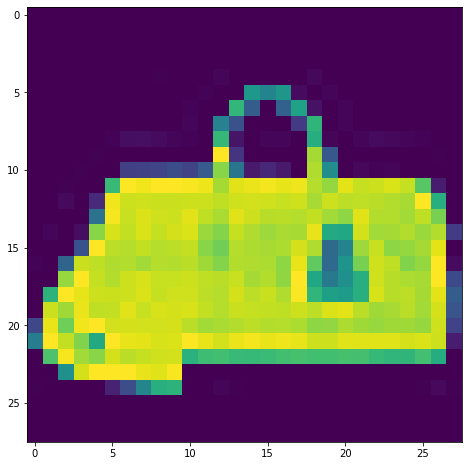

In [7]:
# set the size of the plot
plt.figure(figsize=(8,8))

# Select just the pixel columns and convert them to a numpy array by using .values. 
imgs = df[pixel_cols].values
print(type(imgs))

# Select just one image from all the images
img = imgs[999]

# Reshape the image to be a 28x28 matrix (original format of image)
img = img.reshape(28,28)

# Plot reshaped image
plt.imshow(img)

In [8]:
print(img.shape, type(img))
flat_image = img.flatten()
print(flat_image.shape, type(flat_image))

(28, 28) <class 'numpy.ndarray'>
(784,) <class 'numpy.ndarray'>


___
# 2. Select and engineer our features.
1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 
2. Define our `X` and `y` data. 
2. Train-test-split our `X` and `y` data

### 1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 

In [14]:
# DOING THIS AGAIN JUST FOR PRACTICE 

# Grabs all of the columns 
selected_features = df.columns


# Convert the all columns object into a regular list
selected_features = list(selected_features)

# Sanity check that it is now just a list.
print(type(selected_features))

# Remove the label column from the list
# This happnes 'in place'
selected_features.remove('label')

<class 'list'>


### 2. Define our `X` and `y`

In [15]:
# 2. Define our `X` and `y` data. 

X = df[selected_features]

y = df['label']

In [16]:
print(df.shape)
df.label.value_counts()

(6000, 785)


Sandal         646
Trouser        612
Ankle boot     605
Shirt          601
Pullover       598
Coat           597
T-shirt/top    590
Dress          585
Bag            584
Sneaker        582
Name: label, dtype: int64

### 3. Train-test-split our `X` and `y` data

In [17]:
# 3. Train-test-split our `X` and `y` data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25)

____
# 3. Build and train our model
1. Initalize an empty Support Vector Classifier model.
2. Fit that model with our training data. 

In [28]:
# 1. Initalize an empty Support Vector Classifier model.
from sklearn import svm

# Initalize our Support Vector Classifier
model = svm.SVC()

In [29]:
# 2. Fit that model with our training data. 
model.fit(X_train, y_train)

SVC()

___
# 4. Evaluate our model
1. Get a baseline accuracy score.
2. Make new predictions using our test data. 
3. Print the classification report. 
4. Plot the confusion matrix of our predicted results. 

### 1. Get a baseline accuracy score.

In [30]:
### 1. Get and print a baseline accuracy score.
accuracy = model.score(X_test, y_test)
print("Accuracy %f" % accuracy)

Accuracy 0.848000


In [45]:
model.predict_proba(X_test)

AttributeError: predict_proba is not available when  probability=False

### 2. Make new predictions using our test data. 

In [46]:
### 2. Make new predictions using our test data. 

y_pred = model.predict(X_test)

### 3. Print the classification report. 
Use the sklearn helper fuction for this. 

In [33]:
### 3. Print the classification report. 

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Ankle boot       0.95      0.95      0.95       164
         Bag       0.95      0.94      0.94       155
        Coat       0.78      0.74      0.76       160
       Dress       0.77      0.90      0.83       167
    Pullover       0.76      0.71      0.73       139
      Sandal       0.93      0.95      0.94       156
       Shirt       0.65      0.61      0.63       130
     Sneaker       0.91      0.89      0.90       142
 T-shirt/top       0.79      0.82      0.80       146
     Trouser       0.99      0.92      0.96       141

    accuracy                           0.85      1500
   macro avg       0.85      0.84      0.84      1500
weighted avg       0.85      0.85      0.85      1500



### 4. Plot the confusion matrix of our predicted results. 

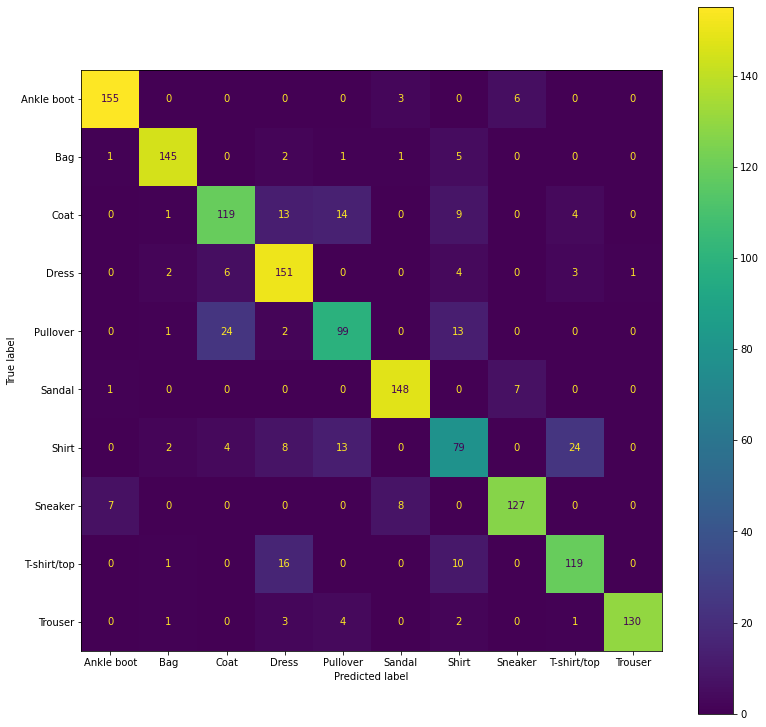

In [35]:
### 4. Plot the confusion matrix of our predicted results.

fig, ax = plt.subplots(figsize=(13,13))
metrics.plot_confusion_matrix(estimator=model,
                            X=X_test,
                            y_true=y_test,
                            ax=ax)

### Looking at the confusion matrix, which two clothing items were mis-classfied with eachother the most?

In [36]:
print('The classifier mistaked pull-over and coat the most.')

The classifier mistaked pull-over and coat the most.


___
### Build a function thats input is an unfitted model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 

In [48]:
### Build a function thats input is an empty model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 
def build_and_eval_model(model, X, y, random_state=23):
    print('Running report for model', model)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=random_state)
    
    model.fit(X_train, y_train)
    
    accuracy = model.score(X_test, y_test)
    print('\n\nAccuracy %f' % accuracy)
    
    y_pred = model.predict(X_test)
    
    print(metrics.classification_report(y_test, y_pred))
    
    fig, ax = plt.subplots(figsize=(13,13))
    
    metrics.plot_confusion_matrix(estimator=model,
                                 X=X_test,
                                 y_true=y_test,
                                 ax=ax)
    
    return model


## Run LogisticRegression, RandomForest, and Multinomial Naive Bayes through the function you just built and compare the results. 
1. Which classifier did the best, and which classifier did the worst. 

Running report for model LogisticRegression()


Accuracy 0.812000
              precision    recall  f1-score   support

  Ankle boot       0.92      0.94      0.93       160
         Bag       0.91      0.94      0.93       148
        Coat       0.69      0.74      0.71       150
       Dress       0.80      0.83      0.81       145
    Pullover       0.76      0.73      0.74       162
      Sandal       0.93      0.86      0.90       161
       Shirt       0.61      0.52      0.56       153
     Sneaker       0.85      0.90      0.87       141
 T-shirt/top       0.69      0.74      0.71       140
     Trouser       0.94      0.94      0.94       140

    accuracy                           0.81      1500
   macro avg       0.81      0.81      0.81      1500
weighted avg       0.81      0.81      0.81      1500



/Users/atsukosakurai/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

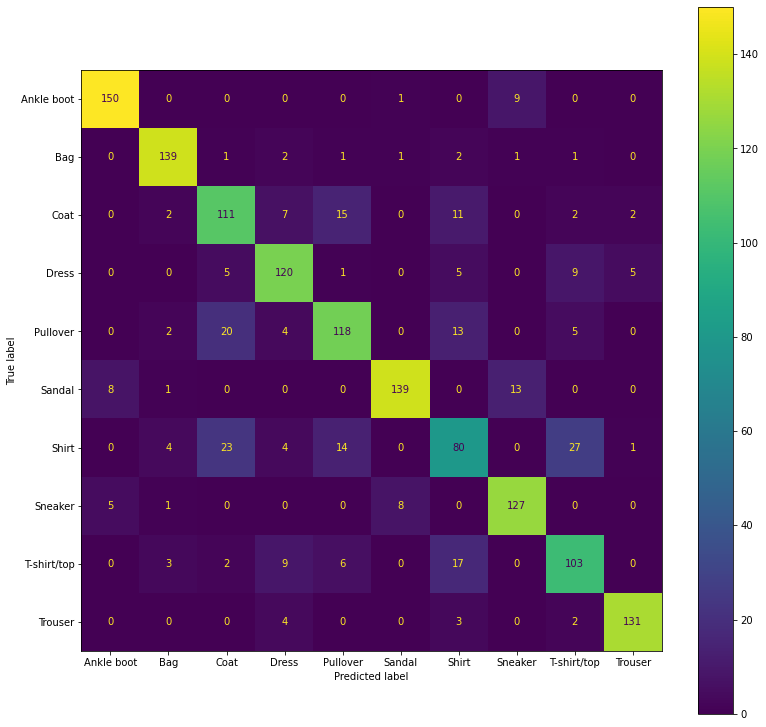

In [49]:
# LogisticRegression

lr=LogisticRegression()
build_and_eval_model(lr, X, y)

Running report for model RandomForestClassifier()


Accuracy 0.848000
              precision    recall  f1-score   support

  Ankle boot       0.91      0.93      0.92       160
         Bag       0.91      0.97      0.94       148
        Coat       0.73      0.81      0.77       150
       Dress       0.82      0.92      0.87       145
    Pullover       0.77      0.75      0.76       162
      Sandal       0.95      0.91      0.93       161
       Shirt       0.69      0.57      0.62       153
     Sneaker       0.88      0.89      0.88       141
 T-shirt/top       0.83      0.81      0.82       140
     Trouser       0.98      0.93      0.96       140

    accuracy                           0.85      1500
   macro avg       0.85      0.85      0.85      1500
weighted avg       0.85      0.85      0.85      1500



RandomForestClassifier()

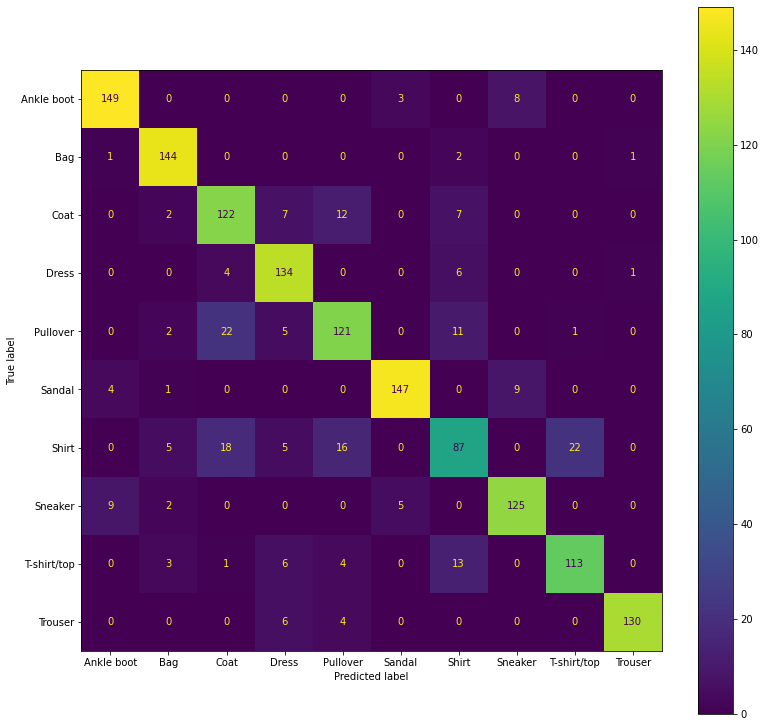

In [52]:
# RandomForest

rf = RandomForestClassifier()
build_and_eval_model(rf, X, y)

Running report for model MultinomialNB()


Accuracy 0.652667
              precision    recall  f1-score   support

  Ankle boot       0.70      0.86      0.78       160
         Bag       0.87      0.84      0.85       148
        Coat       0.44      0.59      0.50       150
       Dress       0.67      0.90      0.77       145
    Pullover       0.67      0.60      0.64       162
      Sandal       0.78      0.09      0.16       161
       Shirt       0.28      0.13      0.18       153
     Sneaker       0.53      0.91      0.67       141
 T-shirt/top       0.72      0.80      0.76       140
     Trouser       0.96      0.90      0.93       140

    accuracy                           0.65      1500
   macro avg       0.66      0.66      0.62      1500
weighted avg       0.66      0.65      0.62      1500



MultinomialNB()

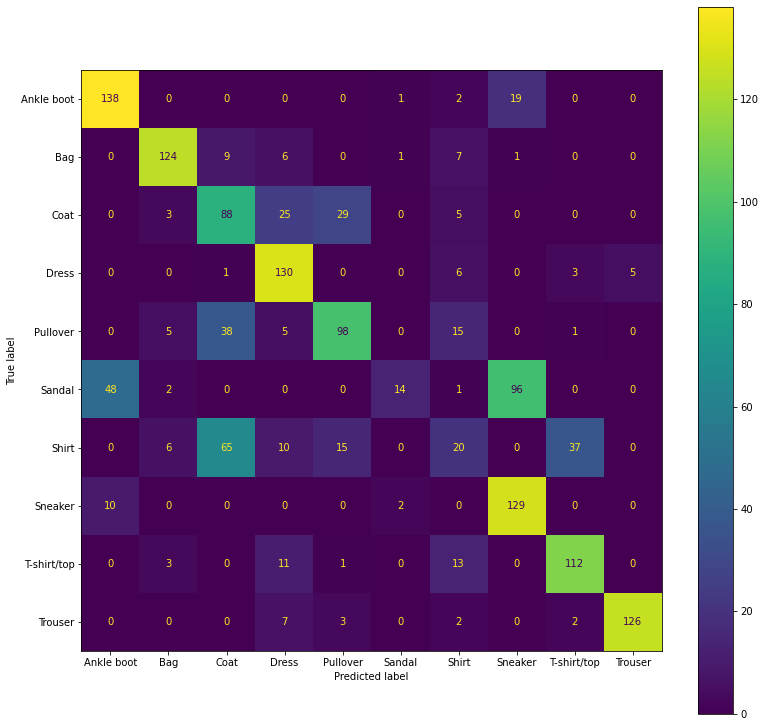

In [55]:
# MultinomialNB

mnb = MultinomialNB()
build_and_eval_model(mnb, X, y)

Running report for model LinearSVC()


Accuracy 0.772667
              precision    recall  f1-score   support

  Ankle boot       0.90      0.90      0.90       160
         Bag       0.89      0.91      0.90       148
        Coat       0.58      0.79      0.67       150
       Dress       0.75      0.77      0.76       145
    Pullover       0.68      0.64      0.66       162
      Sandal       0.93      0.80      0.86       161
       Shirt       0.55      0.41      0.47       153
     Sneaker       0.83      0.89      0.86       141
 T-shirt/top       0.69      0.71      0.70       140
     Trouser       0.95      0.93      0.94       140

    accuracy                           0.77      1500
   macro avg       0.78      0.77      0.77      1500
weighted avg       0.78      0.77      0.77      1500



/Users/atsukosakurai/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

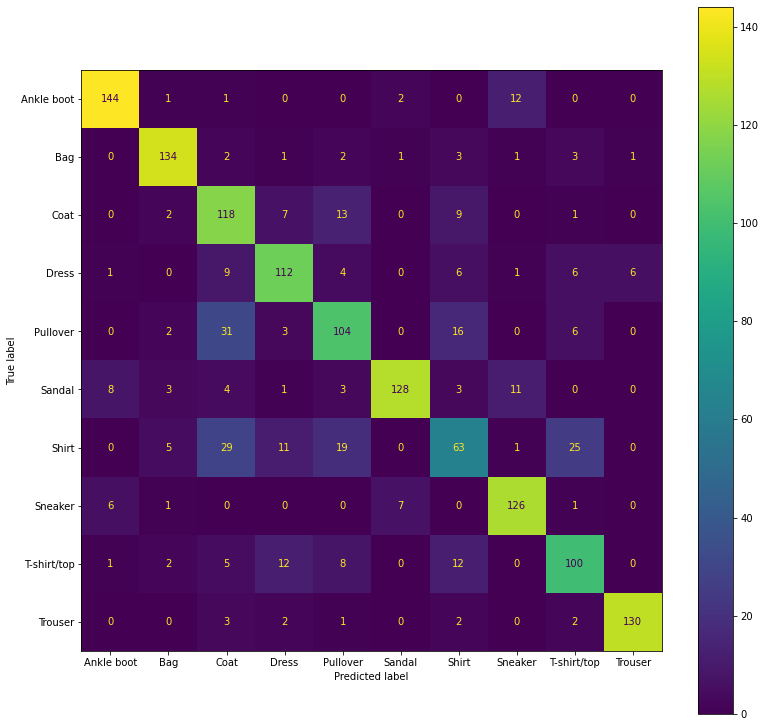

In [56]:
lsvc = svm.LinearSVC()
build_and_eval_model(lsvc, X, y)

Running report for model SVC()


Accuracy 0.846667
              precision    recall  f1-score   support

  Ankle boot       0.90      0.91      0.91       160
         Bag       0.92      0.97      0.95       148
        Coat       0.78      0.85      0.81       150
       Dress       0.83      0.92      0.87       145
    Pullover       0.80      0.71      0.75       162
      Sandal       0.94      0.89      0.91       161
       Shirt       0.66      0.58      0.62       153
     Sneaker       0.85      0.89      0.87       141
 T-shirt/top       0.78      0.83      0.80       140
     Trouser       1.00      0.94      0.97       140

    accuracy                           0.85      1500
   macro avg       0.85      0.85      0.85      1500
weighted avg       0.85      0.85      0.84      1500



SVC()

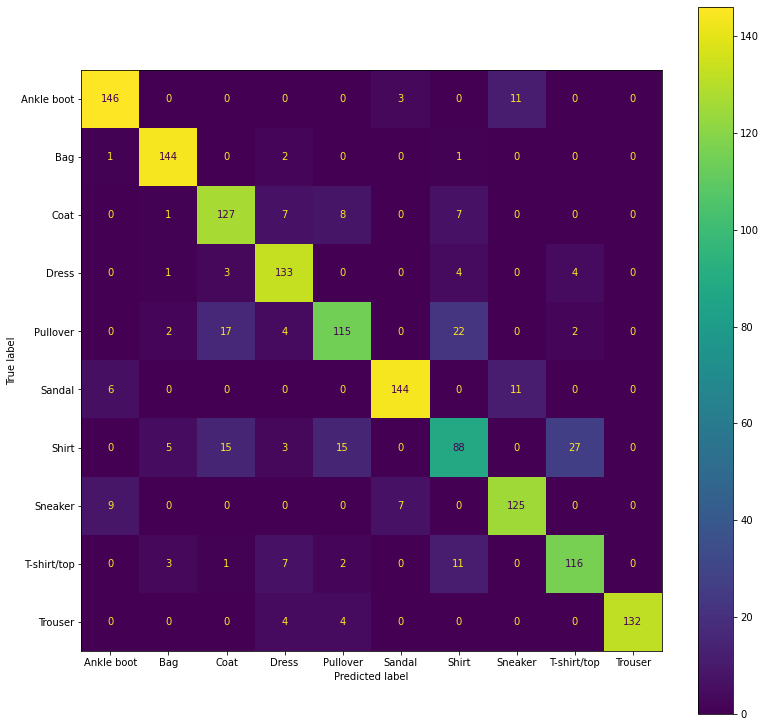

In [57]:
model = svm.SVC()
build_and_eval_model(model, X, y)

In [ ]:
print('YOUR_ANSWER_HERE model did the best and YOUR_ANSWER_HERE model did the worst.')